# 영화 장르간 편향성 측정 (WEAT)
### 루브릭
|평가문항|상세기준|
|---|---|
|1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다.|워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.|
|2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성하였다.|타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.|
|3. WEAT score 계산 및 시각화를 정상적으로 진행하였다.|전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.|

In [1]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

In [2]:
# 데이터 저장 및 불러오기
import pickle

def save_pkl(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)
    
    
def load_pkl(path):
    with open(path, "rb") as f:
        txt = pickle.load(f)
    return txt

In [3]:
pkl_path = os.getenv('HOME')+'/aiffel/weat/tokenized.pkl'

# 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

### 데이터 불러오기

In [63]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [35]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [7]:
gen_list = [read_token(i) for i in genre_txt]

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [8]:
save_pkl(pkl_path, gen_list)

In [4]:
gen_list = load_pkl(pkl_path)

In [30]:
# 사용된 장르 수
len(gen_list)

21

### 추출된 결과로 embedding model 만들기 (Word2Vec)

In [60]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [61]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[('작품', 0.8857658505439758),
 ('다큐멘터리', 0.8529940247535706),
 ('드라마', 0.8216308951377869),
 ('영화로', 0.8115001320838928),
 ('코미디', 0.7875071167945862),
 ('형식', 0.7821910381317139),
 ('주제', 0.7710753679275513),
 ('스토리', 0.7701801657676697),
 ('에마데딘', 0.763795018196106),
 ('설정', 0.7622595429420471)]

에마데딘은 대체 왜 튀어나왔는가...

### 데이터셋 간단히 EDA

<BarContainer object of 21 artists>

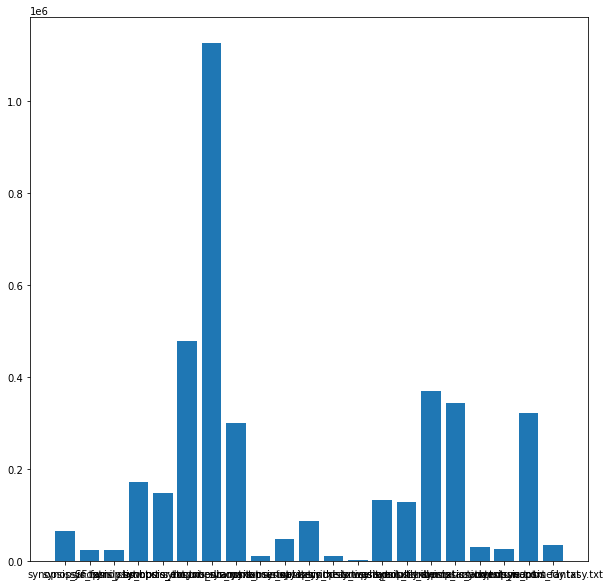

In [41]:
# 장르별 사용된 단어 수 그래프
import matplotlib.pyplot as plt
import seaborn as sns

y = [len(i) for i in gen_list]
x = [j for j in genre_txt]

plt.figure(figsize=(10,10))
plt.bar(x, y)

In [48]:
import statistics as stat

print(stat.median(y)) # 중앙값
print(stat.mean(y)) # 평균
print(y)

87649
184606.57142857142
[65038, 23821, 24369, 170697, 147570, 477808, 1124761, 300036, 10424, 46534, 87649, 10583, 2719, 133364, 127030, 369758, 342982, 29205, 25786, 321161, 35443]


EDA를 통해 간단히 살펴본 결과, 사용된 단어의 수 차이가 굉장히 심하기 때문에, 이에 맞춰서 TfidfVectorizer()에서 max_feature 인자를 줄여서 imbalance함을 좀 줄여보겠다. 

### TF-IDF로 단어셋 추출

In [269]:
# 디폴트 값으로는 42191 단어가 나오기 때문에, 이보다 좀 더 적은 40000으로 줄여본다.
tfidf_vectorizer = TfidfVectorizer(max_features=40000)

In [270]:
tfidf_vectorizer.fit(gen_list)
tfidf_vectorizer.vocabulary_
print(len(tfidf_vectorizer.vocabulary_.items()))
X = tfidf_vectorizer.fit_transform(gen_list)
X.shape

40000


(21, 40000)

In [272]:
print(tfidf_vectorizer.vocabulary_['영화'])
print(tfidf_vectorizer.get_feature_names()[23316])

23316
영화


### 예술, 상업 영화 데이터

In [ ]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

art = read_token(art_txt)
gen = read_token(gen_txt)

In [273]:
tfidf_vectorizer = TfidfVectorizer()
Y = tfidf_vectorizer.fit_transform([art, gen])
print(Y.shape)

(2, 41082)


In [274]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(tfidf_vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(tfidf_vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break
    
print(target_art)
print(target_gen)

['조지나', '의지', '의류', '묵살', '레온', '밋첼', '옴니버스', '피에트로', '불변', '잔소리', '골수', '시모노', '누더기', '스태덤', '우려']
['애하', '실사영화', '엘사', '십만', '나오미', '프란시스코', '수도사', '문하', '대박', '해구', '새봄', '버킹엄', '충헌', '마구잡이', '프란치셰크']


### 장르별 (attribute) 단어 추출 (전 장르)

In [275]:
m = [X[i].tocoo() for i in range(X.shape[0])] # 장르별로 했던 것이 X

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if tfidf_vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(tfidf_vectorizer.get_feature_names()[w[i][j][0]])
            print(tfidf_vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 인간, 조지나, 비영리, 의지, 의류, 묵살, 귀무덤, 레온, 밋첼, 옴니버스, 피에트로, 청산, 불변, 잔소리, 비비고, 
가족: 애하, 실사영화, 가족, 엘사, 인간, 청산, 십만, 실랑이, 귀무덤, 신세, 나오미, 프란시스코, 심리치료, 비영리, 수도사, 
공연: 크리스마스이브, 시뮬레이션, 영업, 인간, 귀무덤, 공립, 열심, 밤중, 백호, 초고, 불산, 옛이야기, 밤톨, 신지, 쥬라기, 
공포(호러): 비영리, 인간, 청산, 귀무덤, 비비고, 공예, 가족, 난사, 정글, 엘리자베스, 포경, 사산, 불변, 심리치료, 사설탐정, 
기타: 엘사, 새봄, 다이버전트, 엘리자베스, 인간, 비영리, 귀무덤, 난사, 농염, 튜바, 어업, 대박, 청산, 애하, 키리시, 
다큐멘터리: 엘사, 엘리자베스, 다기, 다나카, 비영리, 대박, 인간, 갈피, 새봄, 키리시, 귀무덤, 가족, 허가증, 멜라, 심리치료, 
드라마: 인간, 엘사, 귀무덤, 비영리, 엘리자베스, 난사, 청산, 애하, 어업, 실랑이, 가족, 다이버전트, 새봄, 대박, 신세, 
멜로로맨스: 귀무덤, 인간, 난사, 어업, 비영리, 청산, 마구잡이, 결백, 애하, 실랑이, 엘리자베스, 장문, 빈털터리, 원일, 신세, 
뮤지컬: 무용, 귀무덤, 천둥, 면세, 엘리자베스, 크리스마스이브, 인간, 엘사, 메이커, 초고, 저택, 상대편, 댄스, 찰벳, 캐스퍼, 
미스터리: 비비고, 귀무덤, 인간, 비영리, 비상, 사산, 청산, 난사, 심리치료, 유기, 포경, 불변, 엘리자베스, 경우, 학당, 
범죄: 비비고, 인간, 경우, 귀무덤, 배틀, 절박, 사산, 비영리, 난사, 사설탐정, 소스케, 표트르, 배탈, 위암, 어업, 
사극: 인간, 신념, 헝거게임, 귀무덤, 찰벳, 왁스, 비영리, 포장, 잔소리, 타쿠미, 호통, 군장, 알리오, 재주, 광대, 
서부극(웨스턴): 베티, 규칙, 인간, 개그, 심리치료, 야마시타, 목자, 펑펑, 마님, 콜라쥬, 볼링장, 방패, 라벨, 순회, 가족, 
성인물(에로): 귀무덤, 

TF-IDF max_feature 설정시, 30000단어로 한 것 보다, 40000단어에서 (눈으로 딱 보기에도) 더욱 정확도가 높았다. 디폴트 값부터가 40000단어 초반대인 것을 고려하면 그 이하로 낮춘다 해서 정확도가 올라가는 것은 아닌 것으로 보인다.

## WEAT score 구하기

In [276]:
# 코사인 유사도 계산
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

# WEAT score 함수
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [277]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [278]:
art_mat = np.array([model.wv[word] for word in target_art])
gen_mat = np.array([model.wv[word] for word in target_gen])
# matrix에 채운다
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(art_mat, gen_mat, A, B)

In [279]:
# WEAT score들을 확인해보자
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 0.16529013
SF 공연 0.41311973
SF 공포(호러) -0.026452765
SF 기타 0.5112148
SF 다큐멘터리 0.19156303
SF 드라마 0.30164468
SF 멜로로맨스 0.5726727
SF 뮤지컬 0.82234025
SF 미스터리 0.35991752
SF 범죄 0.09962108
SF 사극 0.6628002
SF 서부극(웨스턴) 0.14145853
SF 성인물(에로) 0.8059546
SF 스릴러 -0.08012887
SF 애니메이션 0.028778672
SF 액션 0.13021562
SF 어드벤처 0.42431638
SF 전쟁 0.8644662
SF 코미디 -0.03605535
SF 판타지 0.60533464
가족 공연 0.23006196
가족 공포(호러) -0.30456483
가족 기타 0.14489307
가족 다큐멘터리 -0.08149853
가족 드라마 0.36234194
가족 멜로로맨스 0.5176737
가족 뮤지컬 0.4449451
가족 미스터리 0.07145693
가족 범죄 -0.0677088
가족 사극 0.011857519
가족 서부극(웨스턴) -0.14521788
가족 성인물(에로) 0.43026912
가족 스릴러 -0.3280693
가족 애니메이션 -0.22302382
가족 액션 -0.16163921
가족 어드벤처 -0.0060106614
가족 전쟁 0.19743472
가족 코미디 -0.43430316
가족 판타지 0.15418667
공연 공포(호러) -0.48305723
공연 기타 -0.2633422
공연 다큐멘터리 -0.34081435
공연 드라마 -0.14648259
공연 멜로로맨스 0.1133794
공연 뮤지컬 0.4356567
공연 미스터리 -0.34144908
공연 범죄 -0.5132404
공연 사극 -0.27576318
공연 서부극(웨스턴) -0.4491823
공연 성인물(에로) 0.35306436
공연 스릴러 -0.5756456
공연 애니메이션 -0.4443066
공연 액션 -0.3

<AxesSubplot:>

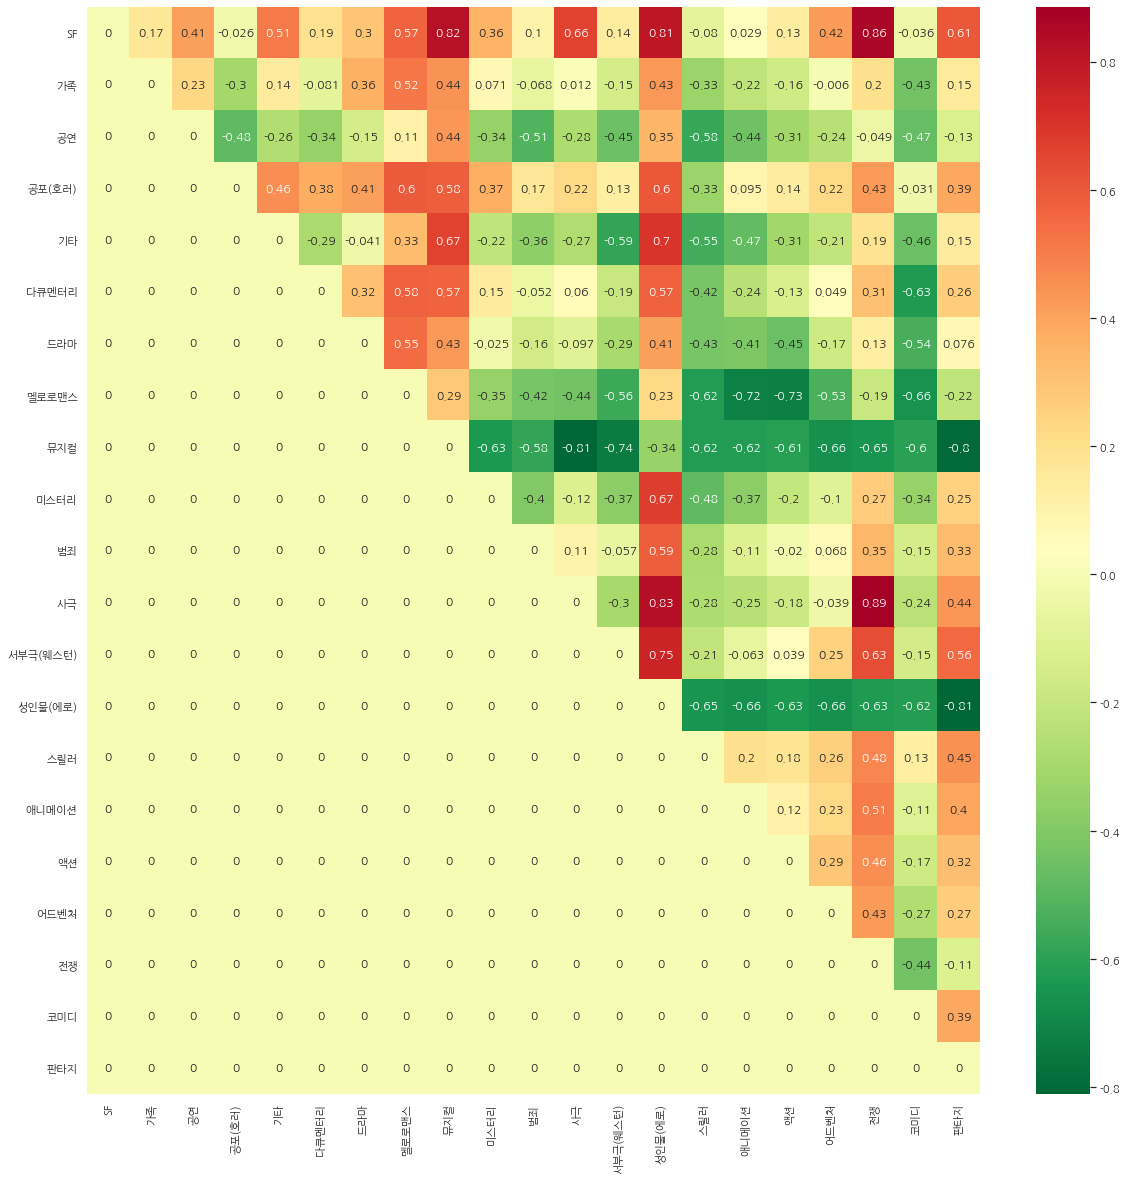

In [280]:
np.random.seed(42)

sns.set(font='NanumGothic')
plt.figure(figsize = (20,20))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

1. SF - 뮤지컬 : 0.82 SF는 일반영화, 뮤지컬은 예술 영화에 가까움
2. SF - 전쟁 : 0.86 SF는 일반영화, 전쟁영화는 예술 영화에 가까움(?)
3. 사극 - 전쟁 : 0.89 사극은 일반영화, 전쟁영화는 예술영화에 가까움
4. 뮤지컬 - 사극 : -0.81 뮤지컬은 일반영화, 사극영화는 예술영화에 가까움

# 회고
- SF는 대부분 일반영화, 뮤지컬과 성인물은 예술영화로 분류했던 점에서는 그나마 제대로 분류한 것으로 보인다.   
- sklearn의 TfidfVectorizer()의 인자 수정을 통해 어느정도 중복 단어나 feature 단어들을 줄일 수 있다는 점을 새로 알게 되어 여러모로 만져보았는데, 무지성 라이브러리 사용을 하지 말고 다시 한 번 두드리고 가보자!
- max_feature를 많이 줄여보니 예시로 앞서서 한 것보다는 그나마 적절히 나온 것으로 보인다.
- 다만 아예 근본적으로 문제를 해결할 방법은 더 찾아봐야 할 것 같다...ㅠㅠㅠ